In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
# Load dataset
data = pd.read_csv('./dataset/bank-full.csv',sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [19]:
pd.concat((data,pd.get_dummies(data['job']).iloc[:,:-1]),axis=1).head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,1,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,1,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0


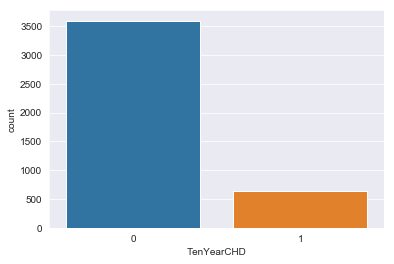

In [4]:
sns.countplot(x='TenYearCHD',data=data)

In [7]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


data_new =  data.dropna()
data_new.info()

In [ ]:
from sklearn.cross_validation import train_test_split

In [6]:
X = data_new.iloc[:,:-1]
y = data_new.iloc[:,-1]

In [9]:
X.keys()

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [33]:
x_train, x_test,y_train, y_test = train_test_split(X,y,test_size=0.2)

In [34]:
x_train.shape

(2926, 15)

In [35]:
#import statsmodels.formula.api as smf
import statsmodels.api as sm

In [36]:
model = sm.GLM(y_train,x_train).fit()

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 2926
Model:                            GLM   Df Residuals:                     2911
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.11939
Method:                          IRLS   Log-Likelihood:                -1034.9
Date:                Sat, 05 Jan 2019   Deviance:                       347.55
Time:                        11:27:57   Pearson chi2:                     348.
No. Iterations:                     3   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
male                0.0575      0.014      4.073      0.000       0.030       0.085
age                 0.0045      0.001      5.612      0.000       0.003       0.006
education          -0.0192      0.006     -3.072      0.002      -0.031      -0.007
currentSmoker      -0.0171      0.020     -0.853      0.393      -0.056       0.022
cigsPerDay          0.0024      0.001      2.778      0.005       0.001       0.004
BPMeds              0.0781      0.039      1.999      0.046       0.002       0.155
prevalentStroke     0.0043      0.091      0.047      0.963      -0.174       0.182
prevalentHyp        0.0721      0.018      4.085      0.000       0.038       0.107
diabetes            0.1194      0.052      2.305      0.021       0.018       0.221
totChol            2.9e-05      0.000      0.190      0.850      -0.000       0.000
sysBP               0.0022      0.001      3.913      0.000       0.001       0.003
diaBP              -0.0024      0.001     -2.696      0.007      -0.004      -0.001
BMI                -0.0049      0.002     -2.976      0.003      -0.008      -0.002
heartRate          -0.0017      0.001     -3.314      0.001      -0.003      -0.001
glucose             0.0008      0.000      2.260      0.024       0.000       0.001
===================================================================================
"""

In [38]:
model.null_deviance

380.10013670539996

In [39]:
model.aic

2099.797053828842

# glm -> generalized linear model
model = smf.glm(formula='TenYearCHD~male+age+education+currentSmoker+cigsPerDay+BPMeds+prevalentStroke+prevalentHyp+diabetes+totChol+sysBP+diaBP+BMI+heartRate+glucose',data=data,
                family=sm.families.Binomial())

result = model.fit()
result.summary()

Results:
> **Significant variables that cannot be controlled**
- Gender
- Age
- Medical history

> **Significant variables that can be controlled**
- Smoking habits
- Cholesterol
- Systolic BP
- Blood glucose


In [28]:
model.null_deviance

375.9292549555708

In [29]:
model.aic

2049.52368161045

In [30]:
pseudo = 1-(302/331)
pseudo

0.08761329305135956

In [43]:
data['TenYearCHD']= model.resid_deviance
data.head(2)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,-0.014989
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0.006926


# Test your Model

In [43]:
y_pred = model.predict(x_test)

In [63]:
def pred(y):
    if y >= 0.15:
        return 1
    else:
        return 0

In [64]:
y_class = y_pred.apply(pred)

In [65]:
y_true = y_test

In [66]:
from pandas_ml import ConfusionMatrix

In [67]:
cm = ConfusionMatrix(y_true,y_class)
cm

Predicted  False  True  __all__
Actual                         
False        360   264      624
True          22    86      108
__all__      382   350      732

In [68]:
cm.stats()

OrderedDict([('population', 732),
             ('P', 108),
             ('N', 624),
             ('PositiveTest', 350),
             ('NegativeTest', 382),
             ('TP', 86),
             ('TN', 360),
             ('FP', 264),
             ('FN', 22),
             ('TPR', 0.7962962962962963),
             ('TNR', 0.5769230769230769),
             ('PPV', 0.24571428571428572),
             ('NPV', 0.9424083769633508),
             ('FPR', 0.4230769230769231),
             ('FDR', 0.7542857142857143),
             ('FNR', 0.2037037037037037),
             ('ACC', 0.6092896174863388),
             ('F1_score', 0.37554585152838427),
             ('MCC', 0.2649736255798057),
             ('informedness', 0.37321937321937315),
             ('markedness', 0.18812266267763644),
             ('prevalence', 0.14754098360655737),
             ('LRP', 1.8821548821548821),
             ('LRN', 0.3530864197530864),
             ('DOR', 5.330578512396694),
             ('FOR', 0.057591623036649

print('True Positive = ',cm.TP)
print('True Negative =', cm.TN)
print('False Positive = ',cm.FP)
print('False Negative =', cm.FN)
print('Predicted Positive = ',cm.P)
print('Predicted Negative = ',cm.N)
print('Total = ',cm.population)

In [59]:
random = ((624*726)+(108*6))/732**2
acc= 0.8579

In [60]:
kappa  = (acc - random)/(1-random)
print('kappa value is = ',kappa)

kappa value is =  0.07317423312883461


In [69]:
from sklearn.metrics import cohen_kappa_score

In [70]:
cohen_kappa_score(y_true,y_class)

0.193733247065348

# ROC Curve

In [71]:
from sklearn.metrics import roc_curve,auc

In [72]:
fpr,tpr,threshold = roc_curve(y_true,y_pred)

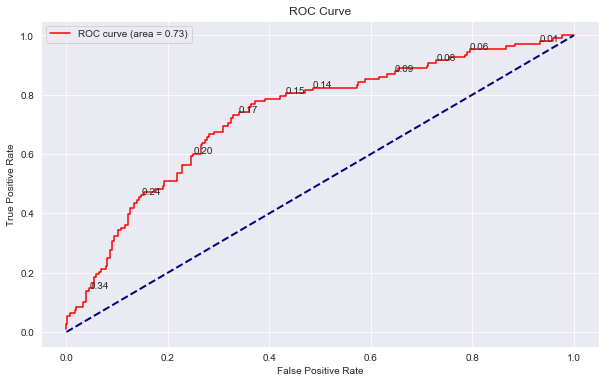

In [73]:
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='red',lw=1.5)
plt.plot([0, 1], [0, 1], color='navy',lw = 2, linestyle='--')

for i,value in enumerate(fpr*10):
    try:
        if (round(fpr[i+1]*10) - round(fpr[i]*10)) == 1:
            plt.text(fpr[i],tpr[i],'%0.2f'%(threshold[i]))
    except IndexError:
        print(' ')
        
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(['ROC curve (area = %0.2f)' % auc(fpr,tpr)])
plt.show()